# Validation pipeline 

In [1]:
import torch 

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

device

device(type='cuda')

In [2]:
from rich import print

In [3]:
# Read the images from of the dataset 
import os 

img_folder = 'photos/'

if not os.path.exists(img_folder) or len(os.listdir(img_folder)) == 0:
    os.makedirs(img_folder, exist_ok=True)

In [4]:
import json 

data = [] 

with open("/home/think3/Desktop/2. tf_testing_araclip/XTD_dataset/en_ar_XTD10_edited_v2.jsonl") as filino:

    for file_i in filino:

        dic_obj = json.loads(file_i)
        data.append(dic_obj)

In [5]:
print("Dataset size is: ", len(data) )

Dataset size is:  1000

In [6]:
print(data[:10])

[
    {
        'caption_en': 'major league baseball game with player from pittsburgh pirates crossing home plate',
        'caption_ar': 'تخطي لاعب فريق بيتسبرج بايرتس منطقة اللوحة الرئيسية في مباراة بدوري البيسبول',
        'image_name': 'COCO_train2014_000000061844.jpg',
        'id': 61844
    },
    {
        'caption_en': 'a cat with its paws on a computer mouse at a desk',
        'caption_ar': 'وقوف قطة بمخالبها على فأرة حاسوب على المكتب',
        'image_name': 'COCO_train2014_000000061849.jpg',
        'id': 61849
    },
    {
        'caption_en': 'flock of birds taking off from water near long pier on open ocean',
        'caption_ar': 'تحليق سرب من الطيور من الماء بالقرب من رصيف بحري طويل في عرض المحيط',
        'image_name': 'COCO_train2014_000000061850.jpg',
        'id': 61850
    },
    {
        'caption_en': 'black and white photo of officer offering an item to bear sitting down',
        'caption_ar': 'صورة بالأبيض والأسود لضابط يضع شيئاً لدب جالس',
        'image_name': 'COCO_train2014_000000061852.jpg',
        'id': 61852
    },
    {
        'caption_en': 'a bowl of chinese vegetables in broth , french fries on the side and a bottle of water',
        'caption_ar': 'صحن به شوربة صينية بالخضار، وإلى جانبه بطاطس مقلية وزجاجة ماء',
        'image_name': 'COCO_train2014_000000061854.jpg',
        'id': 61854
    },
    {
        'caption_en': 'the man in black outfit snowboards in the icy area',
        'caption_ar': 'رجل يرتدي زي أسود يتزحلق على الجليد في منطقة جليدية',
        'image_name': 'COCO_train2014_000000061865.jpg',
        'id': 61865
    },
    {
        'caption_en': 'a group of zebra walking on top of a lush green field',
        'caption_ar': 'قطيع من الحمار الوحشي يمشي فوق أرض خضراء واسعة',
        'image_name': 'COCO_train2014_000000061867.jpg',
        'id': 61867
    },
    {
        'caption_en': 'three women are actively playing a video game in front of a crowd',
        'caption_ar': 'ثلاث نساء يلعبن لعبة فيديو بحماس أمام حشد من الناس',
        'image_name': 'COCO_train2014_000000061877.jpg',
        'id': 61877
    },
    {
        'caption_en': "a bed with two pillows and a woman ' s legs with shoes laying on the bed",
        'caption_ar': 'سرير بوسادتين وأرجل امرأة ترتدي حذاء مستلقية على السرير',
        'image_name': 'COCO_train2014_000000061881.jpg',
        'id': 61881
    },
    {
        'caption_en': 'a man in business attire poses for a photo in an office building',
        'caption_ar': 'رجل بملابس العمل يقف لالتقاط صورة في مبنى إداري',
        'image_name': 'COCO_train2014_000000061892.jpg',
        'id': 61892
    }
]

In [7]:
Check_id_duplication = [] 

In [8]:
for idx, data_obj in enumerate(data):

    Check_id_duplication.append(data_obj["id"])

In [9]:
# If the len is 1000, there is no duplicates

len(set(Check_id_duplication)) == 1000

True

In [10]:
# data = [
#     {'image_id': 0, 'id': 391895, 'caption': 'رجل يرتدي خوذة حمراء على دراجة بخارية صغيرة على طريق ترابي'},
#     {'image_id': 1, 'id': 522418, 'caption': 'امرأة ترتدي شبكة على رأسها تقطع كعكة'},
#     {'image_id': 2, 'id': 184613, 'caption': 'طفل يحمل مظلة مزهرة ويأكل ثورًا'},
# ]

# Sort the list of dictionaries based on the 'id' key
sorted_data = sorted(data, key=lambda x: x['id'])

print(sorted_data[:20])
# # Print the sorted list
# for item in sorted_data:
#     print(item)

[
    {
        'caption_en': 'major league baseball game with player from pittsburgh pirates crossing home plate',
        'caption_ar': 'تخطي لاعب فريق بيتسبرج بايرتس منطقة اللوحة الرئيسية في مباراة بدوري البيسبول',
        'image_name': 'COCO_train2014_000000061844.jpg',
        'id': 61844
    },
    {
        'caption_en': 'a cat with its paws on a computer mouse at a desk',
        'caption_ar': 'وقوف قطة بمخالبها على فأرة حاسوب على المكتب',
        'image_name': 'COCO_train2014_000000061849.jpg',
        'id': 61849
    },
    {
        'caption_en': 'flock of birds taking off from water near long pier on open ocean',
        'caption_ar': 'تحليق سرب من الطيور من الماء بالقرب من رصيف بحري طويل في عرض المحيط',
        'image_name': 'COCO_train2014_000000061850.jpg',
        'id': 61850
    },
    {
        'caption_en': 'black and white photo of officer offering an item to bear sitting down',
        'caption_ar': 'صورة بالأبيض والأسود لضابط يضع شيئاً لدب جالس',
        'image_name': 'COCO_train2014_000000061852.jpg',
        'id': 61852
    },
    {
        'caption_en': 'a bowl of chinese vegetables in broth , french fries on the side and a bottle of water',
        'caption_ar': 'صحن به شوربة صينية بالخضار، وإلى جانبه بطاطس مقلية وزجاجة ماء',
        'image_name': 'COCO_train2014_000000061854.jpg',
        'id': 61854
    },
    {
        'caption_en': 'the man in black outfit snowboards in the icy area',
        'caption_ar': 'رجل يرتدي زي أسود يتزحلق على الجليد في منطقة جليدية',
        'image_name': 'COCO_train2014_000000061865.jpg',
        'id': 61865
    },
    {
        'caption_en': 'a group of zebra walking on top of a lush green field',
        'caption_ar': 'قطيع من الحمار الوحشي يمشي فوق أرض خضراء واسعة',
        'image_name': 'COCO_train2014_000000061867.jpg',
        'id': 61867
    },
    {
        'caption_en': 'three women are actively playing a video game in front of a crowd',
        'caption_ar': 'ثلاث نساء يلعبن لعبة فيديو بحماس أمام حشد من الناس',
        'image_name': 'COCO_train2014_000000061877.jpg',
        'id': 61877
    },
    {
        'caption_en': "a bed with two pillows and a woman ' s legs with shoes laying on the bed",
        'caption_ar': 'سرير بوسادتين وأرجل امرأة ترتدي حذاء مستلقية على السرير',
        'image_name': 'COCO_train2014_000000061881.jpg',
        'id': 61881
    },
    {
        'caption_en': 'a man in business attire poses for a photo in an office building',
        'caption_ar': 'رجل بملابس العمل يقف لالتقاط صورة في مبنى إداري',
        'image_name': 'COCO_train2014_000000061892.jpg',
        'id': 61892
    },
    {
        'caption_en': 'a man riding a wave on top of a surfboard in the ocean',
        'caption_ar': 'رجل يركب موجة فوق لوح ركوب الأمواج في المحيط',
        'image_name': 'COCO_train2014_000000061895.jpg',
        'id': 61895
    },
    {
        'caption_en': 'a very nice looking motorcycle parked in a lot by a car',
        'caption_ar': 'دراجة نارية أنيقة المظهر متوقفة في ساحة الانتظار بجانب سيارة',
        'image_name': 'COCO_train2014_000000061904.jpg',
        'id': 61904
    },
    {
        'caption_en': 'a living room with couch , chairs , tv and an oriental rug',
        'caption_ar': 'غرفة معيشة بها أريكة وكراسي وتلفزيون وسجادة شرقية',
        'image_name': 'COCO_train2014_000000061911.jpg',
        'id': 61911
    },
    {
        'caption_en': 'a young man wearing a black shirt and blue tie in front of a forest',
        'caption_ar': 'شاب يرتدي قميصًا أسود وربطة عنق زرقاء أمام غابة',
        'image_name': 'COCO_train2014_000000061918.jpg',
        'id': 61918
    },
    {
        'caption_en': 'a small giraffe studies a steep hill that borders his enclosure',
        'caption_ar': 'زرافة صغيرة تتأمل بتل شديد الانحدار يحد محيطها',
        'image_name': 'COCO_train2014_000000061919.jpg',
        'id': 61919
    },
    {
        'caption_en': 'a bathroom has patterned walls , a urinal , and a toilet',
        'caption_ar': 'حمام يحتوي على جد

In [11]:
# get only 10 examples
# sorted_data

In [12]:
len(sorted_data)

1000

In [13]:
print(sorted_data[:10])

[
    {
        'caption_en': 'major league baseball game with player from pittsburgh pirates crossing home plate',
        'caption_ar': 'تخطي لاعب فريق بيتسبرج بايرتس منطقة اللوحة الرئيسية في مباراة بدوري البيسبول',
        'image_name': 'COCO_train2014_000000061844.jpg',
        'id': 61844
    },
    {
        'caption_en': 'a cat with its paws on a computer mouse at a desk',
        'caption_ar': 'وقوف قطة بمخالبها على فأرة حاسوب على المكتب',
        'image_name': 'COCO_train2014_000000061849.jpg',
        'id': 61849
    },
    {
        'caption_en': 'flock of birds taking off from water near long pier on open ocean',
        'caption_ar': 'تحليق سرب من الطيور من الماء بالقرب من رصيف بحري طويل في عرض المحيط',
        'image_name': 'COCO_train2014_000000061850.jpg',
        'id': 61850
    },
    {
        'caption_en': 'black and white photo of officer offering an item to bear sitting down',
        'caption_ar': 'صورة بالأبيض والأسود لضابط يضع شيئاً لدب جالس',
        'image_name': 'COCO_train2014_000000061852.jpg',
        'id': 61852
    },
    {
        'caption_en': 'a bowl of chinese vegetables in broth , french fries on the side and a bottle of water',
        'caption_ar': 'صحن به شوربة صينية بالخضار، وإلى جانبه بطاطس مقلية وزجاجة ماء',
        'image_name': 'COCO_train2014_000000061854.jpg',
        'id': 61854
    },
    {
        'caption_en': 'the man in black outfit snowboards in the icy area',
        'caption_ar': 'رجل يرتدي زي أسود يتزحلق على الجليد في منطقة جليدية',
        'image_name': 'COCO_train2014_000000061865.jpg',
        'id': 61865
    },
    {
        'caption_en': 'a group of zebra walking on top of a lush green field',
        'caption_ar': 'قطيع من الحمار الوحشي يمشي فوق أرض خضراء واسعة',
        'image_name': 'COCO_train2014_000000061867.jpg',
        'id': 61867
    },
    {
        'caption_en': 'three women are actively playing a video game in front of a crowd',
        'caption_ar': 'ثلاث نساء يلعبن لعبة فيديو بحماس أمام حشد من الناس',
        'image_name': 'COCO_train2014_000000061877.jpg',
        'id': 61877
    },
    {
        'caption_en': "a bed with two pillows and a woman ' s legs with shoes laying on the bed",
        'caption_ar': 'سرير بوسادتين وأرجل امرأة ترتدي حذاء مستلقية على السرير',
        'image_name': 'COCO_train2014_000000061881.jpg',
        'id': 61881
    },
    {
        'caption_en': 'a man in business attire poses for a photo in an office building',
        'caption_ar': 'رجل بملابس العمل يقف لالتقاط صورة في مبنى إداري',
        'image_name': 'COCO_train2014_000000061892.jpg',
        'id': 61892
    }
]

In [14]:
image_name_list = []

for lin in sorted_data:
    # print(lin["image_name"])
    image_name_list.append(lin["image_name"])

In [15]:
print(image_name_list)

[
    'COCO_train2014_000000061844.jpg',
    'COCO_train2014_000000061849.jpg',
    'COCO_train2014_000000061850.jpg',
    'COCO_train2014_000000061852.jpg',
    'COCO_train2014_000000061854.jpg',
    'COCO_train2014_000000061865.jpg',
    'COCO_train2014_000000061867.jpg',
    'COCO_train2014_000000061877.jpg',
    'COCO_train2014_000000061881.jpg',
    'COCO_train2014_000000061892.jpg',
    'COCO_train2014_000000061895.jpg',
    'COCO_train2014_000000061904.jpg',
    'COCO_train2014_000000061911.jpg',
    'COCO_train2014_000000061918.jpg',
    'COCO_train2014_000000061919.jpg',
    'COCO_train2014_000000061936.jpg',
    'COCO_train2014_000000061945.jpg',
    'COCO_train2014_000000061946.jpg',
    'COCO_train2014_000000061949.jpg',
    'COCO_train2014_000000061951.jpg',
    'COCO_train2014_000000061966.jpg',
    'COCO_train2014_000000061982.jpg',
    'COCO_train2014_000000061992.jpg',
    'COCO_train2014_000000062017.jpg',
    'COCO_train2014_000000062029.jpg',
    'COCO_train2014_000000062030.jpg',
    'COCO_train2014_000000062031.jpg',
    'COCO_train2014_000000062038.jpg',
    'COCO_train2014_000000062046.jpg',
    'COCO_train2014_000000062048.jpg',
    'COCO_train2014_000000062053.jpg',
    'COCO_train2014_000000062057.jpg',
    'COCO_train2014_000000062067.jpg',
    'COCO_train2014_000000062075.jpg',
    'COCO_train2014_000000062127.jpg',
    'COCO_train2014_000000062128.jpg',
    'COCO_train2014_000000062129.jpg',
    'COCO_train2014_000000062131.jpg',
    'COCO_train2014_000000062132.jpg',
    'COCO_train2014_000000062160.jpg',
    'COCO_train2014_000000062173.jpg',
    'COCO_train2014_000000062175.jpg',
    'COCO_train2014_000000062193.jpg',
    'COCO_train2014_000000062195.jpg',
    'COCO_train2014_000000062203.jpg',
    'COCO_train2014_000000062204.jpg',
    'COCO_train2014_000000062209.jpg',
    'COCO_train2014_000000062216.jpg',
    'COCO_train2014_000000062219.jpg',
    'COCO_train2014_000000062225.jpg',
    'COCO_train2014_000000062226.jpg',
    'COCO_train2014_000000062231.jpg',
    'COCO_train2014_000000062233.jpg',
    'COCO_train2014_000000062237.jpg',
    'COCO_train2014_000000062245.jpg',
    'COCO_train2014_000000062246.jpg',
    'COCO_train2014_000000062257.jpg',
    'COCO_train2014_000000062261.jpg',
    'COCO_train2014_000000062263.jpg',
    'COCO_train2014_000000062272.jpg',
    'COCO_train2014_000000062276.jpg',
    'COCO_train2014_000000062279.jpg',
    'COCO_train2014_000000062292.jpg',
    'COCO_train2014_000000062293.jpg',
    'COCO_train2014_000000062295.jpg',
    'COCO_train2014_000000062301.jpg',
    'COCO_train2014_000000062307.jpg',
    'COCO_train2014_000000062313.jpg',
    'COCO_train2014_000000062324.jpg',
    'COCO_train2014_000000062329.jpg',
    'COCO_train2014_000000062336.jpg',
    'COCO_train2014_000000062337.jpg',
    'COCO_train2014_000000062344.jpg',
    'COCO_train2014_000000062348.jpg',
    'COCO_train2014_000000062350.jpg',
    'COCO_train2014_000000062351.jpg',
    'COCO_train2014_000000062357.jpg',
    'COCO_train2014_000000062376.jpg',
    'COCO_train2014_000000062386.jpg',
    'COCO_train2014_000000062387.jpg',
    'COCO_train2014_000000062389.jpg',
    'COCO_train2014_000000062390.jpg',
    'COCO_train2014_000000062392.jpg',
    'COCO_train2014_000000062395.jpg',
    'COCO_train2014_000000062397.jpg',
    'COCO_train2014_000000062412.jpg',
    'COCO_train2014_000000062420.jpg',
    'COCO_train2014_000000062426.jpg',
    'COCO_train2014_000000062427.jpg',
    'COCO_train2014_000000062440.jpg',
    'COCO_train2014_000000062442.jpg',
    'COCO_train2014_000000062446.jpg',
    'COCO_train2014_000000062455.jpg',
    'COCO_train2014_000000062464.jpg',
    'COCO_train2014_000000062468.jpg',
    'COCO_train2014_000000062472.jpg',
    'COCO_train2014_000000062477.jpg',
    'COCO_train2014_000000062478.jpg',
    'COCO_train2014_000000062480.jpg',
    'COCO_train2014_000000062481.jpg',
    'COCO_train2014_000000062531.jpg',
    'COCO_train2014_000000062541.jpg',
    'COCO_train2014_

In [16]:
sorted_data[0]

{'caption_en': 'major league baseball game with player from pittsburgh pirates crossing home plate',
 'caption_ar': 'تخطي لاعب فريق بيتسبرج بايرتس منطقة اللوحة الرئيسية في مباراة بدوري البيسبول',
 'image_name': 'COCO_train2014_000000061844.jpg',
 'id': 61844}

In [17]:
# Create a mapping dictionary between the ids and paths

id2path = {}


for im_path, sort_sample in zip(image_name_list, sorted_data):


    # print(json.loads(lin)["text"])
    # print(im_path.split("_")[-1].split(".")[0])

    input_str = im_path.split("_")[-1].split(".")[0]
    # print(input_str)
    result = int(input_str.lstrip('0'))
    # Check the ids
    if sort_sample['id'] != result:
        print("stop ........................................................")
    id2path[result] = im_path

    # print(result)

In [18]:
id2path

{61844: 'COCO_train2014_000000061844.jpg',
 61849: 'COCO_train2014_000000061849.jpg',
 61850: 'COCO_train2014_000000061850.jpg',
 61852: 'COCO_train2014_000000061852.jpg',
 61854: 'COCO_train2014_000000061854.jpg',
 61865: 'COCO_train2014_000000061865.jpg',
 61867: 'COCO_train2014_000000061867.jpg',
 61877: 'COCO_train2014_000000061877.jpg',
 61881: 'COCO_train2014_000000061881.jpg',
 61892: 'COCO_train2014_000000061892.jpg',
 61895: 'COCO_train2014_000000061895.jpg',
 61904: 'COCO_train2014_000000061904.jpg',
 61911: 'COCO_train2014_000000061911.jpg',
 61918: 'COCO_train2014_000000061918.jpg',
 61919: 'COCO_train2014_000000061919.jpg',
 61936: 'COCO_train2014_000000061936.jpg',
 61945: 'COCO_train2014_000000061945.jpg',
 61946: 'COCO_train2014_000000061946.jpg',
 61949: 'COCO_train2014_000000061949.jpg',
 61951: 'COCO_train2014_000000061951.jpg',
 61966: 'COCO_train2014_000000061966.jpg',
 61982: 'COCO_train2014_000000061982.jpg',
 61992: 'COCO_train2014_000000061992.jpg',
 62017: 'CO

In [19]:
# Check if each image file exists in the folder

folder_path = "/home/think3/Desktop/2. tf_testing_araclip/photos/XTD10_dataset"

missing_images = []

for image_path in image_name_list:
    full_image_path = os.path.join(folder_path, image_path)
    if not os.path.exists(full_image_path):
        missing_images.append(image_path)

if missing_images:
    print("The following images are missing:")
    for image_path in missing_images:
        print(image_path)
else:
    print("All images are present in the folder.")

All images are present in the folder.

In [20]:
# Delete the images that are not included on the testing dataset 

import os


not_exist_paths = []
exist_paths = [] 

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Remove any files in the folder that are not in the list of image paths
for file_name in all_files:
    if file_name not in image_name_list:
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)
        # print(f"Removed: {file_path}")
        not_exist_paths.append(file_path)

    elif file_name in image_name_list:

        exist_paths.append(file_name)


destroy_images = set(not_exist_paths).difference(set(exist_paths))


print("img_names", len(all_files))
print("destroy_images", len(destroy_images))
print("not_exist_paths", len(not_exist_paths))
print("remaining images", len(all_files)- len(destroy_images))

# print("Finished removing unwanted images.")

img_names 1000

destroy_images 0

not_exist_paths 0

remaining images 1000

Define the the text model 

In [21]:
from multilingual_clip import pt_multilingual_clip
import transformers


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model_name = 'M-CLIP/XLM-Roberta-Large-Vit-B-16Plus'

text_model = pt_multilingual_clip.MultilingualCLIP.from_pretrained(model_name)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)


2023-12-19 10:36:17.080981: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 10:36:17.148735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 10:36:18.329704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [22]:
tokenizer("Test", padding=True, return_tensors='pt')

{'input_ids': tensor([[   0, 8647,    2]]), 'attention_mask': tensor([[1, 1, 1]])}

In [23]:
text_model


MultilingualCLIP(
  (transformer): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0): XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)

In [24]:
import numpy as np

In [25]:
language_model = lambda queries:  np.asarray(text_model.forward(queries, tokenizer).detach().to('cpu'))  

### Define the image model 

In [26]:
# clip_model, compose = clip.load('RN50x4')
import torch
import open_clip

device = "cuda" if torch.cuda.is_available() else "cpu"

print("Device: ", device)

clip_model, _, compose = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
# image_tokenizer = open_clip.get_tokenizer('ViT-B-16-plus-240')
# clip_model.to(device)


Device:  cuda

In [27]:
compose

Compose(
    Resize(size=240, interpolation=bicubic, max_size=None, antialias=None)
    CenterCrop(size=(240, 240))
    <function _convert_to_rgb at 0x7feeaa64f820>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [28]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [29]:
clip_model.to(device)

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 896, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0): ResidualAttentionBlock(
          (ln_1): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=896, out_features=896, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((896,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=896, out_features=3584, bias=True)
            (gelu): GELU()
            (c_proj): Linear(in_features=3584, out_features=896, bias=True)
          )
          (ls_2): Identity()
        )
        (1): ResidualAttentionBlock(
          (ln_1): LayerNorm((896,), eps=1e-05, elementwise_affine

### Defind  the image model 

In [30]:
image_model = lambda images: np.asarray(clip_model.encode_image(images.to(device)).float().detach().to('cpu'))


# Utils

In [31]:
# Define the needed libraries in the code 

from tqdm.notebook import tqdm
import os 
from PIL import Image

### Defind a dataset class for images 

In [32]:

class CustomDataSet(torch.utils.data.Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        self.total_imgs = image_name_list
        print(self.total_imgs[:20])

    def __len__(self):
        return len(self.total_imgs)

    def get_image_name(self, idx):

        return self.total_imgs[idx]

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc)

        return self.transform(image)

### Defind a dataset class for text dataset  

In [33]:
class SimpleTextDataset(torch.utils.data.Dataset):

    def __init__(self, texts):
        """Define  the class init"""
        self.texts = texts

    def __len__(self):
        """Return the length of the text dataset"""
        return len(self.texts)

    def __getitem__(self, idx):
        """Get the item based on index"""
        return self.texts[idx]

In [34]:
def text_encoder(text):
    """Normalize the text embeddings"""
    embedding = language_model(text)
    embedding = embedding / np.linalg.norm(embedding)

    return embedding

def precompute_text_features(loader):
    """Compute the text embeddings of the whole dataset based on the loader provided"""
    text_features = []

    for _, (texts) in enumerate(tqdm(loader)):

        embedding = language_model(texts)
        embedding = embedding / np.linalg.norm(embedding)

        text_features.extend(embedding)

    return np.array(text_features)

In [35]:
def precompute_image_features(loader):
    image_features = []
    
    for i, (images) in enumerate(tqdm(loader)):

        features = image_model(images)

        features = features / np.linalg.norm(features)
        image_features.extend(features)

    return np.array(image_features)

In [36]:
def show_images(image_list):
    for im_path in image_list:
        print(im_path)
        display(Image.open(im_path))

In [37]:
# text = 'بجعة تطفو أسفل النهر بالقارب'

# image_paths = find_image(text, dataset, image_features, n=3)
# show_images(image_paths)

Build the image dataset 

In [38]:
dataset = CustomDataSet("photos/XTD10_dataset", transform=compose)

[
    'COCO_train2014_000000061844.jpg',
    'COCO_train2014_000000061849.jpg',
    'COCO_train2014_000000061850.jpg',
    'COCO_train2014_000000061852.jpg',
    'COCO_train2014_000000061854.jpg',
    'COCO_train2014_000000061865.jpg',
    'COCO_train2014_000000061867.jpg',
    'COCO_train2014_000000061877.jpg',
    'COCO_train2014_000000061881.jpg',
    'COCO_train2014_000000061892.jpg',
    'COCO_train2014_000000061895.jpg',
    'COCO_train2014_000000061904.jpg',
    'COCO_train2014_000000061911.jpg',
    'COCO_train2014_000000061918.jpg',
    'COCO_train2014_000000061919.jpg',
    'COCO_train2014_000000061936.jpg',
    'COCO_train2014_000000061945.jpg',
    'COCO_train2014_000000061946.jpg',
    'COCO_train2014_000000061949.jpg',
    'COCO_train2014_000000061951.jpg'
]

In [39]:
# check if the image_paths sorted_data in the same order of the image dataset:


for i, item in enumerate(sorted_data):

    if item['image_name'] != dataset.get_image_name(i):
        print("stop")
        break


In [40]:
len(dataset)

1000

### Define the image_loder

In [41]:
image_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=64,
    shuffle=False,
    num_workers=0,
    drop_last=False)

### Define the text_loder

In [42]:
lang = "ar"

if lang =="ar":
    captions_lang = "caption_ar"
else:
    captions_lang = "caption_en"


print(f"The language used in the captions is {captions_lang}")

The language used in the captions is caption_ar

In [43]:
text_dataset = SimpleTextDataset([elem[captions_lang] for elem in sorted_data])

text_loader = torch.utils.data.DataLoader(
    text_dataset,
    batch_size=64,
    shuffle=False)

In [44]:
print("We are processing: ", captions_lang)

We are processing:  caption_ar

In [45]:
# Check this to utalize the GPU memory in the images 
# https://discuss.pytorch.org/t/not-using-multiprocessing-but-getting-cuda-error-re-forked-subprocess/54610/8

In [46]:
import numpy as np

In [47]:
image_features = precompute_image_features(image_loader)

  0%|          | 0/16 [00:00<?, ?it/s]

In [48]:
image_emb_path = 'Cach_embeddings/image_features_XTD_1000_images_XLM_Roberta_Large_Vit_B_16Plus_ar.pickle'

In [49]:
text_emb_path = 'Cach_embeddings/text_features_XTD_1000_images_XLM_Roberta_Large_Vit_B_16Plus_ar.pickle'

In [50]:
import pickle


with open(image_emb_path, 'wb') as handle:
    pickle.dump(image_features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [51]:
import pickle

with open(image_emb_path, 'rb') as handle:
    image_features_new = pickle.load(handle)

image_features_new

array([[ 0.00234814,  0.00241053, -0.0064163 , ...,  0.00275883,
        -0.00204663, -0.00015154],
       [-0.0039345 , -0.00269186, -0.00034103, ..., -0.00783581,
        -0.00483652, -0.00307599],
       [-0.00526666, -0.0009282 , -0.00014784, ..., -0.00507363,
         0.00367123, -0.00334426],
       ...,
       [-0.00796922,  0.00273004, -0.00528321, ..., -0.00279381,
        -0.00673759,  0.00070216],
       [-0.0018826 , -0.00448537, -0.00660262, ..., -0.0056941 ,
        -0.00112356, -0.00307242],
       [-0.00730538, -0.0071854 , -0.00321311, ...,  0.00370673,
         0.00139416,  0.00117591]], dtype=float32)

In [52]:
text_features = precompute_text_features(text_loader)

text_features

  0%|          | 0/16 [00:00<?, ?it/s]

array([[ 0.00216798, -0.00060505, -0.00360225, ..., -0.00053899,
         0.00492899, -0.00252107],
       [ 0.00393123, -0.00064902, -0.01147647, ..., -0.00495645,
        -0.00060793, -0.00046915],
       [-0.00376329,  0.00334111, -0.00482198, ..., -0.00541595,
         0.00290299,  0.00346607],
       ...,
       [ 0.0035398 ,  0.00240931, -0.00364402, ..., -0.00325246,
        -0.00424231, -0.00613816],
       [-0.00218444, -0.00474284, -0.00178007, ..., -0.00261801,
        -0.00739571, -0.00596058],
       [-0.00493613, -0.01257544,  0.00929201, ...,  0.00320698,
        -0.00383607, -0.00088293]], dtype=float32)

In [53]:
import pickle


with open(text_emb_path, 'wb') as handle:
    pickle.dump(text_features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [54]:

with open(text_emb_path, 'rb') as handle:
    text_features_new = pickle.load(handle)

text_features_new

array([[ 0.00216798, -0.00060505, -0.00360225, ..., -0.00053899,
         0.00492899, -0.00252107],
       [ 0.00393123, -0.00064902, -0.01147647, ..., -0.00495645,
        -0.00060793, -0.00046915],
       [-0.00376329,  0.00334111, -0.00482198, ..., -0.00541595,
         0.00290299,  0.00346607],
       ...,
       [ 0.0035398 ,  0.00240931, -0.00364402, ..., -0.00325246,
        -0.00424231, -0.00613816],
       [-0.00218444, -0.00474284, -0.00178007, ..., -0.00261801,
        -0.00739571, -0.00596058],
       [-0.00493613, -0.01257544,  0.00929201, ...,  0.00320698,
        -0.00383607, -0.00088293]], dtype=float32)

In [55]:
image_features_new

array([[ 0.00234814,  0.00241053, -0.0064163 , ...,  0.00275883,
        -0.00204663, -0.00015154],
       [-0.0039345 , -0.00269186, -0.00034103, ..., -0.00783581,
        -0.00483652, -0.00307599],
       [-0.00526666, -0.0009282 , -0.00014784, ..., -0.00507363,
         0.00367123, -0.00334426],
       ...,
       [-0.00796922,  0.00273004, -0.00528321, ..., -0.00279381,
        -0.00673759,  0.00070216],
       [-0.0018826 , -0.00448537, -0.00660262, ..., -0.0056941 ,
        -0.00112356, -0.00307242],
       [-0.00730538, -0.0071854 , -0.00321311, ...,  0.00370673,
         0.00139416,  0.00117591]], dtype=float32)

In [56]:
text_features_new.shape

(1000, 640)

In [57]:
text_features_new[0][:]

array([ 2.1679751e-03, -6.0505257e-04, -3.6022500e-03, -3.3398366e-03,
        1.5912082e-03, -5.6771636e-03, -4.7707325e-03,  3.5062833e-03,
       -2.1396503e-03, -5.4426668e-03, -3.9931112e-03,  3.6811387e-05,
        9.5227342e-03, -1.8504326e-03,  7.4809196e-04, -1.4243510e-03,
       -6.3214236e-04,  2.0412765e-03, -1.5094944e-03, -1.1166389e-02,
       -5.7048473e-04, -5.1419591e-03,  9.7371114e-04,  3.3639262e-03,
        2.2502600e-03, -2.0456461e-03, -6.3544483e-04,  1.7515875e-05,
        1.0575618e-03,  5.8976156e-03, -2.6282065e-03,  1.7774970e-03,
        4.4620386e-03,  1.3539860e-03, -1.8971877e-03, -2.8859994e-03,
        2.2421189e-04, -3.4025775e-03,  3.9679572e-04,  1.9566229e-02,
       -9.6967840e-04, -3.9381566e-03, -8.3074654e-03,  1.5593350e-03,
        2.7279404e-03,  2.1770401e-03, -1.8218391e-03, -2.2344470e-03,
       -5.1553437e-04, -1.4268599e-03,  2.0949633e-03, -2.4786196e-04,
       -3.5800978e-03, -1.7893980e-03,  2.8806431e-03,  6.4184656e-04,
      

In [58]:
image_features_new[0][:]

array([ 2.34813849e-03,  2.41053104e-03, -6.41630171e-03,  1.50750868e-03,
       -2.76315259e-03, -8.46430566e-03, -3.05313780e-03, -2.65704840e-03,
        3.64794140e-03,  4.87243495e-04, -1.72238220e-02,  1.49695494e-03,
        2.24542432e-03, -2.59164814e-03,  6.04533823e-03, -1.57944905e-03,
       -3.20781651e-03, -3.27946735e-03,  1.48038776e-03, -1.10830674e-02,
        2.86794663e-03, -3.57617415e-03,  2.79640337e-03,  1.63189787e-03,
        5.99279441e-03,  1.09763420e-03, -7.70858116e-03,  5.97109320e-04,
        4.28404855e-05,  6.39461400e-03, -4.13835794e-03,  7.55002489e-03,
       -8.76568072e-03, -1.78442081e-03,  4.46310267e-03,  4.34288522e-04,
        4.82595991e-03,  2.05278327e-03,  2.49776943e-03, -1.10847810e-02,
        3.51800071e-03,  2.05472903e-03, -1.35738533e-02,  3.95545457e-03,
        1.21176871e-03,  4.15283605e-04,  2.19388329e-03, -9.18279588e-03,
       -4.47253278e-03, -5.31787868e-04,  9.68787260e-03, -3.92727833e-03,
       -5.25046419e-03, -

In [59]:
# # Take a look later over this

# logit_scale = clip_model.logit_scale.exp().float().detach().to('cpu')
# print(logit_scale)
# logit_scale * text_features_new

In [60]:
# logit_scale_val = logit_scale.item()

In [61]:
def get_path_coco(image_id):
    # image_id = int(image_id)
    # print(type(image_id))

    im_path = id2path[image_id]
    
    return f"photos/XTD10_dataset/{im_path}" # f"photos/val2014/COCO_val2014_{image_id:012d}.jpg"

In [62]:
import numpy as np

In [63]:
mat_indx_mrr = np.zeros((1000,1000),dtype=np.int64)

In [64]:
mat_indx_mrr.shape

(1000, 1000)

In [65]:
mat_indx_mrr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
collect_rr_testing = []

In [67]:
# Check which axis the for loop get back
# So, it loop over the raws

chck_found = np.random.randint(10, size=(2, 4))
for index, distances in enumerate(chck_found):
    print(index)
    print(distances)

0

[9 1 3 2]

1

[4 4 6 0]

In [68]:
# Check the scores  

text_features_new.shape

(1000, 640)

In [69]:
image_features_new.shape

(1000, 640)

In [70]:
(text_features_new * image_features_new).shape

(1000, 640)

In [71]:
np.matmul(text_features_new[999], image_features_new[999].T) * 100

0.8595678955316544

In [72]:
def compare_embeddings(logit_scale, img_embs, txt_embs):
  # normalized features
  image_features = img_embs / img_embs.norm(dim=-1, keepdim=True)
  text_features = txt_embs / txt_embs.norm(dim=-1, keepdim=True)


  # logits_per_image = logit_scale * image_features @ text_features.t()


  logits_per_text = logit_scale * text_features @ image_features.t()

  # print("type: ", type(logits_per_text))
  
  return logits_per_text

In [73]:
# https://github.com/gpleiss/temperature_scaling
# CLIP Temperature scaler
logit_scale = clip_model.logit_scale.exp().float().to('cpu')

print(logit_scale)

language_logits = {}

language_logits["Arabic"] = compare_embeddings(logit_scale, torch.from_numpy(image_features_new), torch.from_numpy(text_features_new))
language_logits["Arabic"].shape

tensor(100., grad_fn=<ToCopyBackward0>)

torch.Size([1000, 1000])

In [74]:
language_logits

{'Arabic': tensor([[38.8908,  5.6053,  5.4207,  ..., 12.6267, -6.4442, -4.2421],
         [ 2.1392, 29.0784, -2.8520,  ..., -0.0675, -2.5894, -3.9901],
         [ 2.5742, -7.7150, 33.6447,  ..., -8.6275, -9.4761, -0.5170],
         ...,
         [ 8.0974,  6.7686,  0.9080,  ..., 34.9260, -9.3451, -2.0824],
         [ 0.3619,  7.4158, -5.5466,  ..., -3.2430, 35.3864, -7.1664],
         [-2.0738, -1.7876, -0.3396,  ..., -5.0374, -5.3268, 33.7272]],
        grad_fn=<MmBackward0>)}

In [75]:
type(language_logits)

dict

In [76]:
language_logits["Arabic"].shape

torch.Size([1000, 1000])

In [77]:
txt_logits = language_logits["Arabic"]

In [78]:
txt_logits.shape

torch.Size([1000, 1000])

In [79]:
import matplotlib.pyplot as plt

Language: Arabic

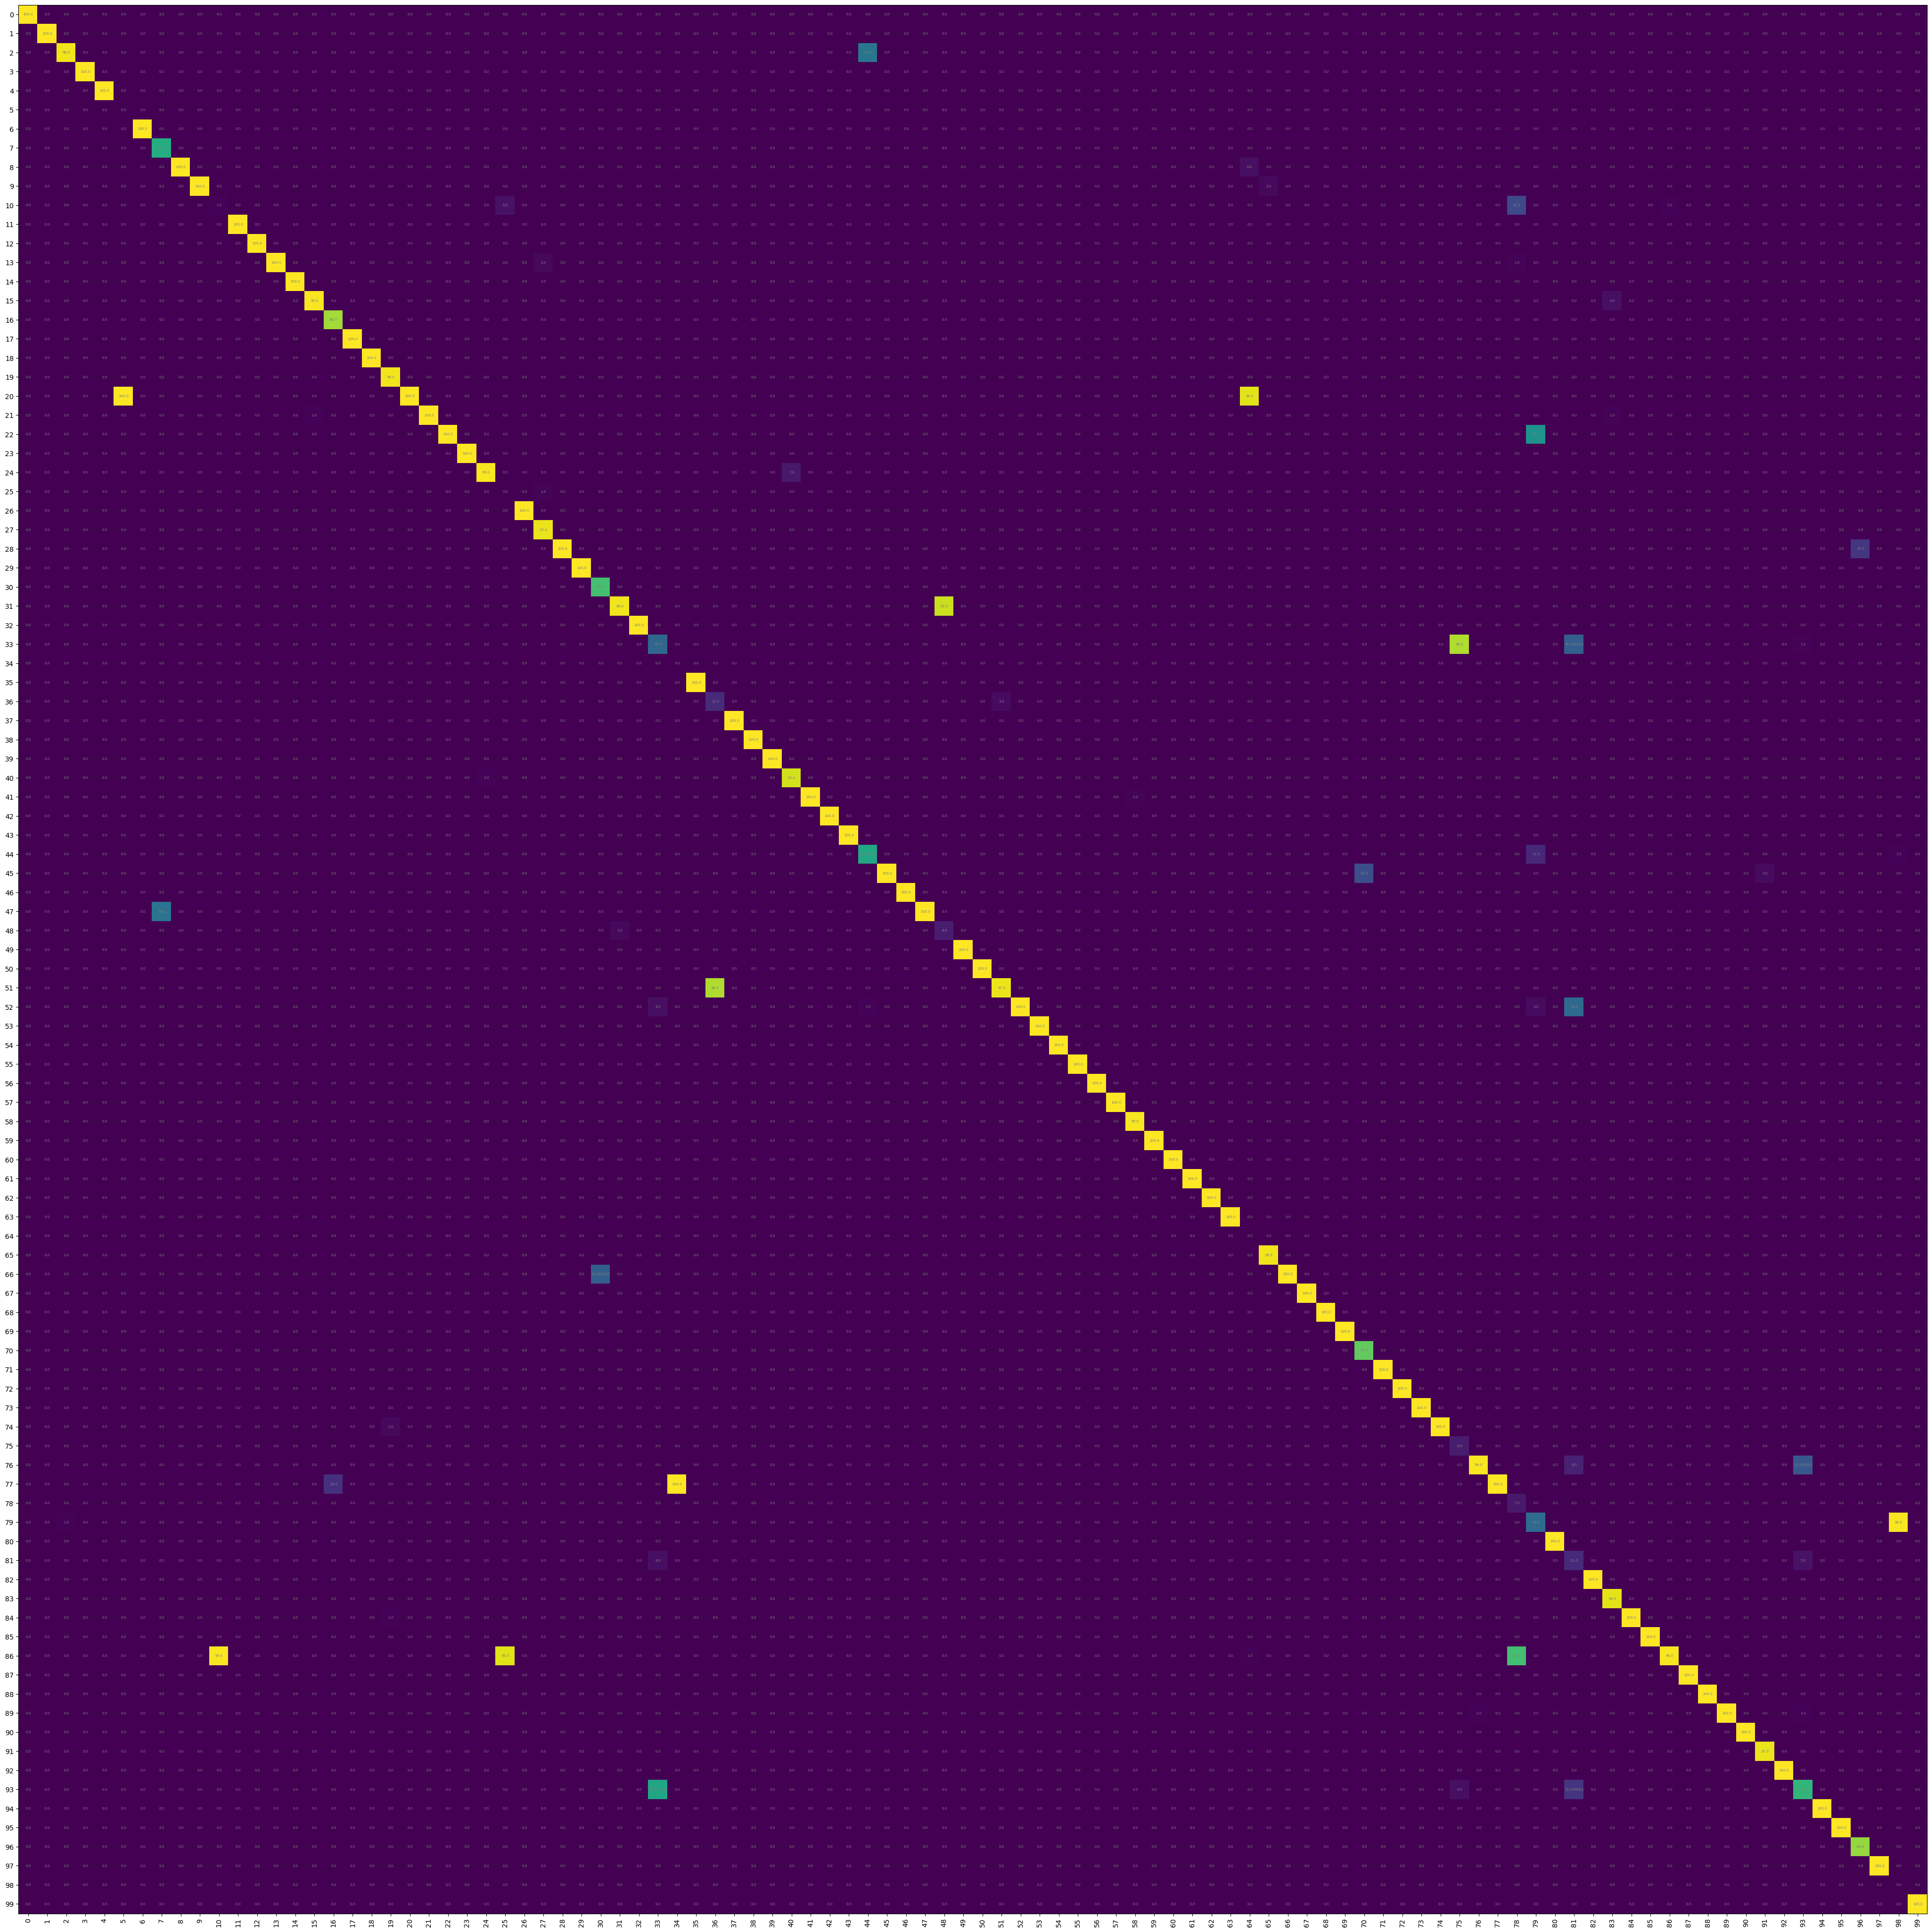

In [80]:
def plot_heatmap(result_matrix):
  height, width = result_matrix.shape
  fig, ax = plt.subplots()
  fig.set_size_inches(50,50)
  im = ax.imshow(result_matrix)


  # Create X & Y Labels
  ax.set_xticks(np.arange(width))
  ax.set_yticks(np.arange(height))
  plt.xticks(rotation=90)

  # ax.set_xticklabels(["Image {}".format(i) for i in range(width)])
  # ax.set_yticklabels(["Text {}".format(i) for i in range(height)])

  for i in range(height):
    for j in range(width):
        text = ax.text(j, i, result_matrix[i, j],
                       ha="center", va="center", color='grey', size=5)

  # fig.tight_layout()
  plt.show()

for lang, txt_logits in language_logits.items():
   
  # Convert Logits into Softmax predictions
  bot_range_ind = 400
  top_range_ind = 500
  probs = txt_logits[bot_range_ind:top_range_ind,bot_range_ind:top_range_ind].softmax(dim=-1).cpu().detach().numpy()

  # Transpose so that each column is the softmax for each picture over the texts
  probs = np.around(probs, decimals=2).T * 100

  print("Language: {}".format(lang))
  plot_heatmap(probs)

In [81]:
sorted_data[400+25]

{'caption_en': 'a half cut pizza on a plate on the table',
 'caption_ar': 'نصف بيتزا مقطعة على طبق على الطاولة',
 'image_name': 'COCO_val2014_000000127476.jpg',
 'id': 127476}

In [82]:
sorted_data[400+86]

{'caption_en': 'two pieces of pizza on a plate with a knife and fork laying on the plate',
 'caption_ar': 'قطعتان من البيتزا على طبق به سكين وشوكة على الطبق',
 'image_name': 'COCO_val2014_000000128180.jpg',
 'id': 128180}

In [83]:
# trial_1 = []

In [84]:
def compute_mrr(data, dataset, n):
    """Compute the MRR for the data based on n"""
    collect_rr = []
    pbar = tqdm(total=len(data), position=0, leave=True)

    # print("text_features")
    # print(text_features)
    # print("image_features")
    # print(image_features)

    # print("image_features shape: ")
    # print(image_features.shape)
    # print()
    # print("text_features shape: ")
    # print(text_features.shape)
    # found = np.matmul(text_features, image_features.T)
    found = np.matmul(text_features_new, image_features_new.T)

    # # instead: first shift the values of f so that the highest number is 0:
    # found -= np.max(found)
    # found_scalled = np.exp(found) / np.sum(np.exp(found)) # safe to do, gives the correct answer


    # found_scalled = softmax(found) # .softmax(dim=-1).cpu().detach().numpy()
    # print("print the matrix for the text features and the images featutes maltiplication found")

    # print(found)

    for index, distances in enumerate(found): # It return the rows, one by one

        pbar.update(1)
        # print()
        # print("index: ", index)
        # print("data[index]['id']: inside the loop", data[index]["id"])
        image_path = get_path_coco(data[index]["id"])
        # print(data[index]["id"])
        # print("New link")
        # print("image_path in compute_mrr ", image_path)
        # print("caption: ", data[index]["caption"])
        # print("distances")
        # print(distances)
        # print("n: ", n)

        
        collect_rr.append(new_rr(distances, image_path, dataset, n,index))


    pbar.close()
    print(100*"=")
    # trial_1 = collect_rr.copy()
    # print(collect_rr)
    
    return np.average(collect_rr)


def new_rr(distances, target_image, dataset, n,index):
    """Calculate the RR for the given target image"""
    image_paths = []

    # print("distances: ", distances)
    # print("type(distances): ", type(distances))
    idxs = distances.argsort()[-n:][::-1] # Get the indcies for the images distances based on n

    # print(idxs)
    
    

    mat_indx_mrr[index,:] = distances.argsort()[::-1]
    
    # print(type(idxs))

    # idxs = distances.argsort()[-n:][::-1] # Get the indcies for the images distances based on n
    
    # print("distances.argsort(): ", distances.argsort())
    # print("distances.argsort()[-n:]: ", distances.argsort()[-n:])
    # print("distances.argsort()[-n:][::-1]: ", distances.argsort()[-n:][::-1])

    # print("idxs of the images from the top to the lower: ", idxs)
    # print("target_image: ", target_image)
    for idx in idxs:
        # print("'photos/val2014/' + dataset.get_image_name(idx): ", 'photos/val2014/' + dataset.get_image_name(idx))
        image_paths.append('photos/XTD10_dataset/' + dataset.get_image_name(idx))
        # image_paths.append(get_path_coco(data[idx]["id"]))

    if target_image in image_paths:

        return 1/(image_paths.index(target_image) + 1)
    else:
        # print("new_rr: ", 0)
        return 0


def internal_hits(distances, target_image, dataset, n):
    """Calculate the hits of the target images based on the existance of it or not"""
    image_paths = []
    idxs = distances.argsort()[-n:][::-1]

    if target_image in idxs:
        return 1
    else:
        return 0

def compute_hits(data, dataset, n):

    index_cnt = 0

    collect_rr = []

    pbar = tqdm(total=len(data), position=0, leave=True)

    found = np.matmul(text_features_new, image_features_new.T)

    for index, distances in enumerate(found):
        pbar.update(1)
        # image_path = get_path_coco(data[index]["id"])
        image_path = index # get_path_coco(data[index]["id"])
        
        collect_rr.append(internal_hits(distances, image_path, dataset, n))
        # collect_rr_testing.append(internal_hits(distances, image_path, dataset, n))

    
    pbar.close()
    # print(len(collect_rr_testing))
    return np.average(collect_rr)

In [85]:
print('MRR@1:', compute_mrr(sorted_data, dataset, 1))

  0%|          | 0/1000 [00:00<?, ?it/s]

====================================================================================================

MRR@1: 0.578

In [86]:
print('MRR@5:', compute_mrr(sorted_data, dataset, 5))

  0%|          | 0/1000 [00:00<?, ?it/s]

====================================================================================================

MRR@5: 0.6818666666666666

In [87]:
print('MRR@10:', compute_mrr(sorted_data, dataset,10))

  0%|          | 0/1000 [00:00<?, ?it/s]

====================================================================================================

MRR@10: 0.6929936507936509

In [88]:
print(compute_hits(sorted_data, dataset, 1)* 100)

  0%|          | 0/1000 [00:00<?, ?it/s]

57.8

In [89]:
print(compute_hits(sorted_data, dataset, 5)* 100)

  0%|          | 0/1000 [00:00<?, ?it/s]

85.1

In [90]:
print(compute_hits(sorted_data, dataset, 10)* 100)

  0%|          | 0/1000 [00:00<?, ?it/s]

93.4

## Evaluation based on Recall metric

In [91]:
image_features_new.shape

(1000, 640)

In [92]:
text_features_new.shape

(1000, 640)

In [93]:
image_features_new_pt = torch.from_numpy(image_features_new)

text_features_new_pt = torch.from_numpy(text_features_new)

text_to_image_map = torch.LongTensor(list(range(text_features_new.shape[0])))
print(text_to_image_map.shape) # .type(torch.int64)

print(text_to_image_map.unsqueeze(1).shape)

torch.Size([1000])

torch.Size([1000, 1])

In [94]:
torch.set_printoptions(precision=8)

In [95]:
# https://github.com/openai/CLIP/issues/115

import torch
from torchvision.datasets import CocoCaptions
import torch.utils.data as dutils
from typing import List
import clip

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

k_vals= [1, 5, 10, 50]


def recall_at_k(k_vals, image_encodings,text_encodings,text_to_image_map):
    print("Encoding all data...")
 
    num_text = text_encodings.shape[0]
    
    # text-to-image recall
    print("Text-to-image recall...")


    dist_matrix = text_encodings @ image_encodings.T  # dist_matrix[i] gives logits for ith text

    inds = torch.argsort(dist_matrix, dim=1, descending=True)
    inds = inds.to(device)
    text_to_image_recall = []

    

    text_to_image_map = text_to_image_map.to(device)
    
    for k in k_vals:
        # Extract top k indices only
        topk = inds[:, :k]

        text_to_image_map_new = text_to_image_map.repeat(k, 1).t()

        correct = torch.eq(topk, text_to_image_map_new).any(dim=1)  #  value along dimension 1 (which typically corresponds to rows in a 2D tensor) ###### any(dim=1) >> check if True over the row 
        
        num_correct = correct.sum().item()

        text_to_image_recall.append(num_correct / num_text)

    print(text_to_image_recall)

    print("Done.")
    return text_to_image_recall

In [96]:
t2i= recall_at_k(k_vals=k_vals, image_encodings=image_features_new_pt,text_encodings=text_features_new_pt,text_to_image_map=text_to_image_map)

print("Text-to-image Recall@K")

print("Returned value: ", t2i)
for k, x in zip(k_vals, t2i):
    print(k, " ", (x/100) * 100)
    # print(f" R@{k}: {100*x:.2f}%")


Encoding all data...

Text-to-image recall...

[0.578, 0.851, 0.934, 0.996]

Done.

Text-to-image Recall@K

Returned value: 
[0.578, 0.851, 0.934, 0.996]

1   0.578

5   0.851

10   0.9340000000000002

50   0.996